In [74]:
import dart_fss as dart

# Open DART API KEY 설정
api_key='	c7e2c241d6af4487d166c5fafc045ad0448e015e'
dart.set_api_key(api_key=api_key)

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

# 삼성전자 검색
samsung = corp_list.find_by_corp_name('주성엔지니어링', exactly=True)[0]

# 2012년부터 연간 연결재무제표 불러오기
fs = samsung.extract_fs(bgn_de='20240101')

# 재무제표 검색 결과를 엑셀파일로 저장 ( 기본저장위치: 실행폴더/fsdata )
fs.save()

Annual reports:   0%|          | 0/2 [00:00<?, ?report/s]

'/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00252135_annual.xlsx'

In [ ]:
import pandas as pd

# --------------------------------------------
# 1) 기업별 재무제표 엑셀 경로 정의
# --------------------------------------------
전기전자 = {
    "삼성전자": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00126380_annual.xlsx",
    "LG전자":  "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00159023_annual.xlsx",
    "SK하이닉스":"/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00164779_annual.xlsx", 
    "DB하이텍":"/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00160843_annual.xlsx"
}

자동차 = {
    "현대자동차": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00164742_annual.xlsx",
    "현대모비스": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00164788_annual.xlsx"
        }

화학 = {
    "LG화학": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00356361_annual.xlsx", 
    # "롯데케미칼": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00165413_annual.xlsx", 
    "한화": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00160588_annual.xlsx",
    "LS": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00105952_annual.xlsx"
    }

통신 = {
    "SK텔레콤": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00401731_annual.xlsx",
    "LG유플러스":"/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00231363_annual.xlsx",
    "SK네트웍스": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00131780_annual.xlsx"}

유통 = {
    "이마트":"/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00872984_annual.xlsx",
    #"롯데쇼핑": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00120526_annual.xlsx", 
    "현대백화점": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00428251_annual.xlsx",
    "GS리테일": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00140177_annual.xlsx"}

# 금융_은행 = {
#     "KB금융": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00688996_annual.xlsx", 
#     "신한지주": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00382199_annual.xlsx", 
#     "하나금융지주":"/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00547583_annual.xlsx"}

# 금융_증권 = {
#     "키움증권": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00296290_annual.xlsx", 
#     "NH투자증권": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00120182_annual.xlsx", 
#     "삼성증권": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00104856_annual.xlsx"}
#금융_은행, 금융_증권 만 오류 발생
    
조선_중공업 = {
    "두산밥캣": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/01032486_annual.xlsx",
    "삼성중공업": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00126478_annual.xlsx"}

건설 = {
    "현대건설": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00164478_annual.xlsx", 
    "GS건설": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00120030_annual.xlsx", 
    "대우건설": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00124540_annual.xlsx", 
    "DL이앤씨": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/01524093_annual.xlsx"}

식품 = {
    #"CJ제일제당": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00635134_annual.xlsx", 
    "농심": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00108241_annual.xlsx"}

제약_바이오 = {
    "삼성바이오로직스":"/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00877059_annual.xlsx", 
    "한미약품":"/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00828497_annual.xlsx",
    "유한양행": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00145109_annual.xlsx"}

콘텐츠_엔터 = {
    "CJ ENM": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00265324_annual.xlsx"}

반도체장비 = {
    #"원익IPS": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/01135941_annual.xlsx",
    "유진테크": "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00531014_annual.xlsx"}
    #"주성엔지니어링" : "/Users/parkchangyu/Githubrepo/Creditcard_Segmentation/company_value/fsdata/00252135_annual.xlsx"}


# --------------------------------------------
# 2) 키워드 기반 값 추출 함수
# --------------------------------------------
def get_value_by_keyword(df, keyword, column):
    matches = [idx for idx in df.index if keyword in str(idx)]
    return df.loc[matches[0], column] if matches else None

# --------------------------------------------
# 3) 지표 추출 함수
# --------------------------------------------
def extract_financial_indicators(corp_name, fs_path):
    try:
                # (1) 각 시트 로딩
        df_bs = pd.read_excel(fs_path, sheet_name="Data_bs", engine="openpyxl")
        df_cf = pd.read_excel(fs_path, sheet_name="Data_cf", engine="openpyxl")

        # 손익계산서 시트 자동 선택 (Data_is 우선)
        xls = pd.ExcelFile(fs_path, engine="openpyxl")
        sheet_names = xls.sheet_names

        if "Data_is" in sheet_names:
            df_is = pd.read_excel(fs_path, sheet_name="Data_is", engine="openpyxl")
        elif "Data_cis" in sheet_names:
            df_is = pd.read_excel(fs_path, sheet_name="Data_cis", engine="openpyxl")
        else:
            raise ValueError(f"[{corp_name}] 손익계산서 시트를 찾을 수 없습니다 (Data_is 또는 Data_cis)")

        # (2) 본문 데이터 정리 (index=concept_id 열)
        df_bs2 = df_bs.iloc[2:].copy().set_index(df_bs.columns[1])
        df_is2 = df_is.iloc[2:].copy().set_index(df_is.columns[1])
        df_cf2 = df_cf.iloc[2:].copy().set_index(df_cf.columns[1])

        # (3) 필요한 컬럼 이름 정의
        col_bs = "20231231"
        col_is = "20230101-20231231"
        col_cf = "20230101-20231231"

        # (4) 주요 값 추출
        total_assets        = get_value_by_keyword(df_bs2, "ifrs-full_Assets", col_bs)
        total_liabilities   = get_value_by_keyword(df_bs2, "ifrs-full_Liabilities", col_bs)
        total_equity        = get_value_by_keyword(df_bs2, "ifrs-full_Equity", col_bs)
        current_assets      = get_value_by_keyword(df_bs2, "ifrs-full_CurrentAssets", col_bs)
        current_liabilities = get_value_by_keyword(df_bs2, "ifrs-full_CurrentLiabilities", col_bs)
        depreciation        = get_value_by_keyword(df_bs2, "ifrs-full_Depreciation", col_bs)
        amortization        = get_value_by_keyword(df_bs2, "ifrs-full_Amortization", col_bs)

        net_sales_2023 = get_value_by_keyword(df_is2, "ifrs-full_Revenue", col_is)
        net_sales_2022 = get_value_by_keyword(df_is2, "ifrs-full_Revenue", "20220101-20221231")
        operating_income  = get_value_by_keyword(df_is2, "dart_OperatingIncomeLoss", col_is)
        net_income        = get_value_by_keyword(df_is2, "ifrs-full_ProfitLossAttributableToOwnersOfParent", col_is)

        operating_cf  = get_value_by_keyword(df_cf2, "ifrs-full_CashFlowsFromUsedInOperatingActivities", col_cf)
        capex         = get_value_by_keyword(df_cf2, "ifrs-full_PurchaseOfPropertyPlantAndEquipmentClassifiedAsInvestingActivities", col_cf)
        interest_paid = get_value_by_keyword(df_cf2, "ifrs-full_InterestPaidClassifiedAsOperatingActivities", col_cf)

        # (5) 지표 계산
        debt_ratio = (total_liabilities / total_equity * 100) if total_equity else None
        int_cover_ratio = (operating_income / abs(interest_paid)) if operating_income and interest_paid else None
        current_ratio = (current_assets / current_liabilities * 100) if current_liabilities else None
        roe = (net_income / total_equity * 100) if total_equity else None
        op_margin = (operating_income / net_sales_2023 * 100) if net_sales_2023 else None
        rev_growth = ((net_sales_2023 - net_sales_2022) / net_sales_2022 * 100) if net_sales_2022 else None
        fcf = (operating_cf - capex) if operating_cf and capex else None
        asset_turnover = (net_sales_2023 / total_assets) if total_assets else None
        ebitda = (
            operating_income + depreciation + amortization
            if all(v is not None for v in [operating_income, depreciation, amortization]) else None
        )

        return {
            "corp_name": corp_name,
            "debt_ratio (%)": debt_ratio,
            "interest_coverage": int_cover_ratio,
            "current_ratio (%)": current_ratio,
            "ROE (%)": roe,
            "Operating_margin (%)": op_margin,
            "Revenue_growth (%)": rev_growth,
            "Free_cash_flow": fcf,
            "Asset_turnover": asset_turnover,
            "EBITDA": ebitda
        }

    except Exception as e:
        print(f"[Error] {corp_name}: {e}")
        return {
            "corp_name": corp_name,
            "debt_ratio (%)": None,
            "interest_coverage": None,
            "current_ratio (%)": None,
            "ROE (%)": None,
            "Operating_margin (%)": None,
            "Revenue_growth (%)": None,
            "Free_cash_flow": None,
            "Asset_turnover": None,
            "EBITDA": None
        }

# --------------------------------------------
# 4) 전체 기업 처리 및 결과 통합
# --------------------------------------------
# 4-1) 전체 기업 딕셔너리 통합
# --------------------------------------------
corp_file_map = {}
for industry in [
    전기전자, 자동차, 화학, 통신, 유통, 
    조선_중공업, 건설, 식품, 제약_바이오, 콘텐츠_엔터, 반도체장비
]:
    corp_file_map.update(industry)
    
# --------------------------------------------
# 4-2) 전체 기업 처리 및 결과 통합
# --------------------------------------------
results = []
for corp_name, path in corp_file_map.items():
    result = extract_financial_indicators(corp_name, path)
    results.append(result)

df_result = pd.DataFrame(results)
print(df_result)


   corp_name         debt_ratio (%)    interest_coverage  current_ratio (%)  \
0       삼성전자   0.017454163322858922    7.774412181495955 258.76647522488673   
1       LG전자 0.00034243430046730866   5.1340134938855835   94.1610070374808   
2     SK하이닉스      87.51899590845855   -6.127679661366266  145.0322522909337   
3      DB하이텍      17.42999353396715   230.20546486732428  466.9457325417208   
4      현대자동차     0.1328157528817243    3.569502276879281 138.66112453183084   
5      현대모비스      44.12649887098174   18.860645702030453  212.1092099064568   
6       LG화학    0.08404103985993057    3.912269249688311 156.92212845754347   
7         한화                    0.0    5.862669936777321  149.6310052201324   
8         LS     242.84240043872956   2.2977420335234338 134.59427515106185   
9      SK텔레콤     186.84320688679858    6.523855783138985 125.58249911632184   
10    LG유플러스      133.8945884434767    4.411771726637786  88.53720468547375   
11    SK네트웍스      1.400305143505316  0.4354155967022

In [99]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# --------------------------------------------
# 1) 정규화할 컬럼 리스트 정의
# --------------------------------------------
features = [
    "debt_ratio (%)",
    "interest_coverage",
    "current_ratio (%)",
    "ROE (%)",
    "Operating_margin (%)",
    "Asset_turnover",
    "Revenue_growth (%)"
]

# --------------------------------------------
# 2) MinMaxScaler 객체 생성
# --------------------------------------------
scaler = MinMaxScaler()

# --------------------------------------------
# 3) 정규화 수행
#    - corp_name 등 문자열 컬럼은 제외
#    - NaN이나 None 값이 있으면, 필요하면 fillna 처리 후 스케일링해야 합니다.
# --------------------------------------------
df_scaled = df_result.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# --------------------------------------------
# 4) 결과 출력
# --------------------------------------------
print(df_scaled)

# --------------------------------------------
# 5) 정규화된 feature들의 평균으로 '기업 성장률' 컬럼 추가
# --------------------------------------------
df_scaled["기업 성장률"] = df_scaled[features].mean(axis=1)

# --------------------------------------------
# 6) 결과 출력
# --------------------------------------------
print(df_scaled)

   corp_name         debt_ratio (%)    interest_coverage  \
0       삼성전자 4.9269529587582276e-05 0.024267068748668685   
1       LG전자  9.666219220362838e-07 0.019658069095926968   
2     SK하이닉스    0.24704820727442345                  0.0   
3      DB하이텍    0.04920130322193522  0.41253595003484145   
4      현대자동차  0.0003749116783921149  0.01692710589338934   
5      현대모비스    0.12456007208738226  0.04361886084208194   
6       LG화학 0.00023723064940770857  0.01752542949734398   
7         한화                    0.0  0.02092998962369221   
8         LS     0.6854943781731334 0.014707159887696285   
9      SK텔레콤     0.5274201197539858 0.022084135529982077   
10    LG유플러스     0.3779570103078695 0.018397345830891063   
11    SK네트웍스  0.0039527747290655085 0.011456339494216702   
12       이마트                    0.0 0.010490278879895103   
13     현대백화점     0.3433128284286806  0.01567229169793998   
14     GS리테일     0.3900827194629882  0.01581646736610663   
15      두산밥캣    0.20937890285001187 0.03

                Feature           Importance
3               ROE (%)   0.2660621329741011
6    Revenue_growth (%)  0.19323960367188678
5        Asset_turnover  0.18509094236340398
1     interest_coverage   0.1441419015868031
4  Operating_margin (%)  0.10008677939015521
0        debt_ratio (%) 0.058680301260855515
2     current_ratio (%) 0.052698338752794484


/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_73890/1500772698.py:34: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_73890/1500772698.py:34: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_73890/1500772698.py:34: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_73890/1500772698.py:34: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fd/p8gl394x5wjgxs6cdb2744br0000gn/T/ipykernel_73890/1500772698.py:34: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/parkchangyu/Library/Python/3.10/lib/python/si

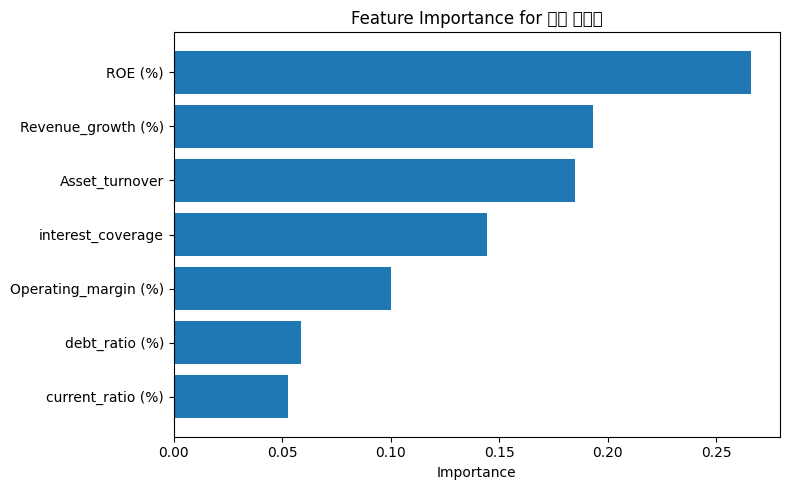

In [100]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# --------------------------------------------
# 1) 피처(X)와 타깃(y) 정의
# --------------------------------------------
X = df_scaled[features]
y = df_scaled["기업 성장률"]

# --------------------------------------------
# 2) 랜덤포레스트 회귀 모델 훈련
# --------------------------------------------
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# --------------------------------------------
# 3) 피처 중요도 추출 및 시각화
# --------------------------------------------
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 출력
print(importance_df)

# 시각화
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance for 기업 성장률")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [101]:
# feature 중요도 → dict 형태로 변환
weights = dict(zip(importance_df["Feature"], importance_df["Importance"]))

# 정규화된 피처에 중요도 가중치를 곱해서 점수 계산
df_scaled["기업성공확률"] = df_scaled[features].apply(
    lambda row: sum(row[feature] * weights[feature] for feature in features), axis=1
)

# 결과 출력
print(df_scaled[["corp_name", "기업 성장률", "기업성공확률"]])

   corp_name              기업 성장률              기업성공확률
0       삼성전자 0.30264049824049033  0.3485139139044081
1       LG전자  0.3302744453028282 0.43500493445298416
2     SK하이닉스 0.08184126385088238 0.05142152583498699
3      DB하이텍  0.4983276102558272   0.514492048047406
4      현대자동차 0.38096073207856446  0.4989788872595582
5      현대모비스  0.4448569043391227  0.5414431082835508
6       LG화학 0.34033343420009915 0.42595992666211946
7         한화 0.26984038208132927  0.3346107238213723
8         LS  0.5937401247695444  0.6918137182891725
9      SK텔레콤  0.4685904543566205  0.5320670823316395
10    LG유플러스 0.38405418712850314  0.4578618199300507
11    SK네트웍스  0.2698859576355341  0.3552628086524237
12       이마트 0.28100743193229305  0.3706351990065987
13     현대백화점 0.25565933209012387 0.26991859520620465
14     GS리테일  0.3890425430646146 0.45804510265226284
15      두산밥캣  0.4831501500760195  0.5957220663500739
16     삼성중공업 0.44594877322692855 0.44219222889042076
17      현대건설  0.5515626181340144  0.6471157041